In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [53]:
df = pd.read_csv("student_data_extended.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df)

     Student_ID  Gender  Age  Attendance  Internal_Marks  Assignment_Score  \
0             1    Male   17          85              78                15   
1             2  Female   18          90              82                18   
2             3    Male   17          88              76                17   
3             4  Female   19          70              65                12   
4             5    Male   18          95              90                20   
..          ...     ...  ...         ...             ...               ...   
995         996  Female   20          81              99                 7   
996         997  Female   21          60              83                17   
997         998  Female   21          71              73                16   
998         999  Female   18          71              71                11   
999        1000  Female   19          92              42                19   

    Performance  
0          Pass  
1          Pass  
2        

In [44]:
print("Basic Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student_ID        1000 non-null   int64 
 1   Gender            1000 non-null   object
 2   Age               1000 non-null   int64 
 3   Attendance        1000 non-null   int64 
 4   Internal_Marks    1000 non-null   int64 
 5   Assignment_Score  1000 non-null   int64 
 6   Performance       1000 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.8+ KB
Basic Info:
 None


In [45]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
         Student_ID          Age   Attendance  Internal_Marks  Assignment_Score
count  1000.000000  1000.000000  1000.000000      1000.00000       1000.000000
mean    500.500000    18.964000    74.892000        70.54400         12.403000
std     288.819436     1.426443    14.671728        17.43198          4.572034
min       1.000000    17.000000    50.000000        40.00000          5.000000
25%     250.750000    18.000000    62.000000        56.75000          8.000000
50%     500.500000    19.000000    74.000000        70.00000         12.000000
75%     750.250000    20.000000    88.000000        85.00000         16.000000
max    1000.000000    21.000000   100.000000       100.00000         20.000000


In [46]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Student_ID          0
Gender              0
Age                 0
Attendance          0
Internal_Marks      0
Assignment_Score    0
Performance         0
dtype: int64


In [47]:

categorical_cols = ['Gender', 'Performance']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

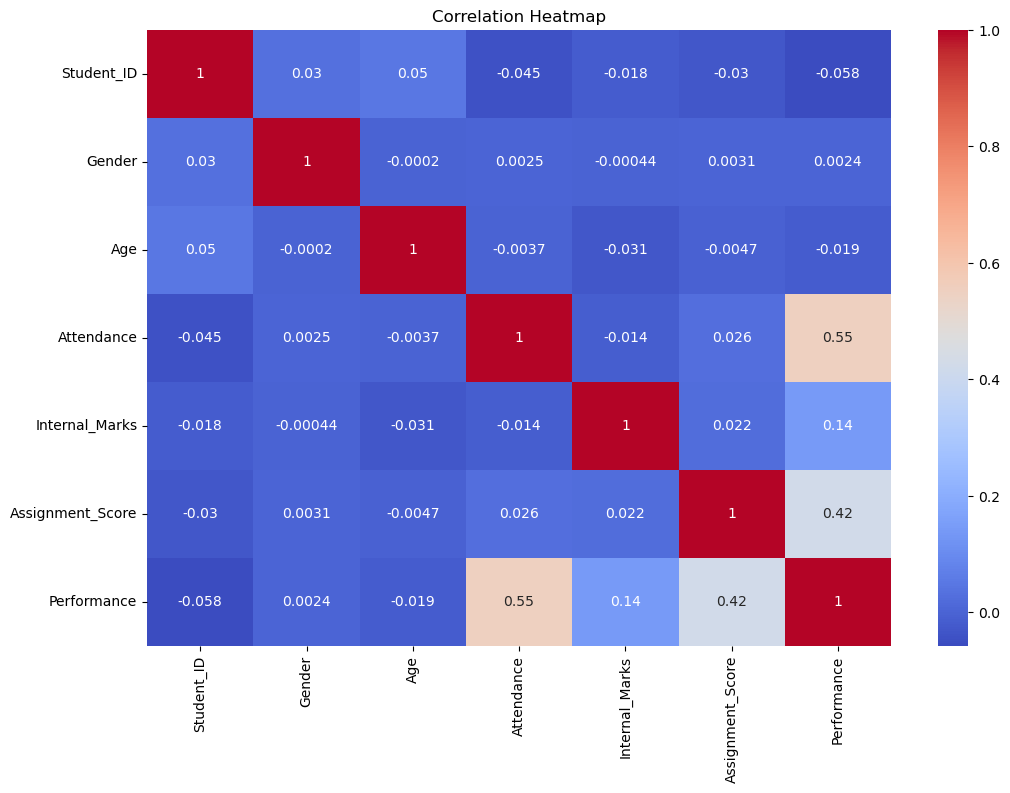

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

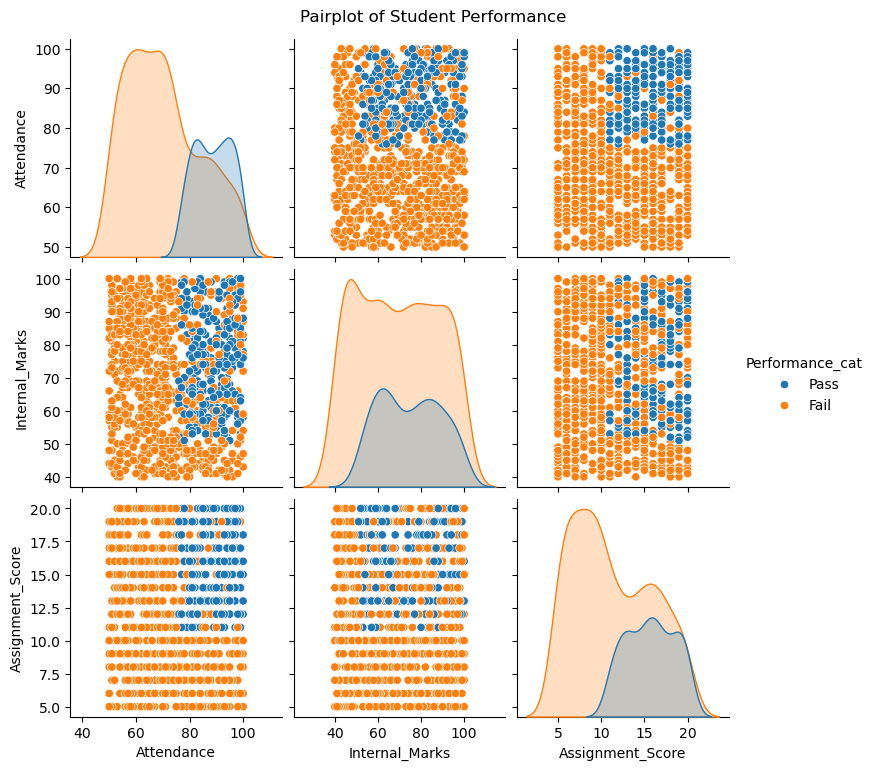

In [49]:
df['Performance_cat'] = label_encoders['Performance'].inverse_transform(df['Performance'])

sns.pairplot(df[['Attendance', 'Internal_Marks', 'Assignment_Score', 'Performance_cat']],
             hue='Performance_cat', diag_kind='kde')
plt.suptitle("Pairplot of Student Performance", y=1.02)
plt.show()
df.drop('Performance_cat', axis=1, inplace=True)

In [50]:

X = df.drop(['Student_ID', 'Performance'], axis=1)
y = df['Performance']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
risk_threshold = 0.6
at_risk = y_prob < risk_threshold
at_risk_students = df.iloc[y_test.index][at_risk].copy()
at_risk_students['Risk_Score'] = y_prob[at_risk]

at_risk_students.to_csv("at_risk_students_report.csv", index=False)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Evaluation Metrics:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precisicion Score:",precision_score(y_test, y_pred))
print("Recall Score:",recall_score(y_test, y_pred))
print("f1 Score:",f1_score(y_test, y_pred))





Confusion Matrix:
 [[153   0]
 [  0  47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Evaluation Metrics:
Accuracy Score: 1.0
Precisicion Score: 1.0
Recall Score: 1.0
f1 Score: 1.0


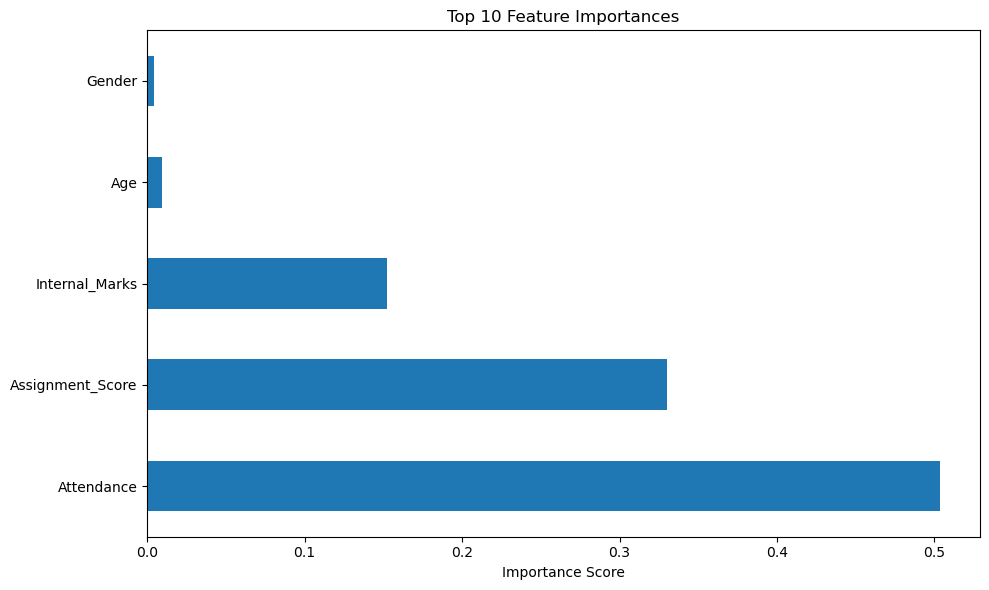

In [51]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances', figsize=(10, 6))
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

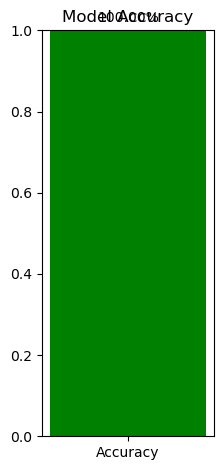

In [52]:
plt.subplot(1, 3, 3)
acc = accuracy_score(y_test, y_pred)
plt.bar(['Accuracy'], [acc], color='green')
plt.ylim(0, 1)
plt.text(0, acc + 0.02, f"{acc:.2%}", ha='center')
plt.title("Model Accuracy")

plt.tight_layout()
plt.show()